In [66]:
using Catalyst, DifferentialEquations, Plots, Statistics, LaTeXStrings
include("../polysome_models.jl")

Main.PolysomeModelC

### Model A

In [4]:
model_a = @reaction_network begin
        k1, 0-->m1
        k2, m1-->0
        k1p, 0-->m2
        k2p, m2-->0
        k7, 0-->r
        k8, r-->0
        k3, m1+r-->r1
        k4, r1-->m1+r
        k5, r1-->m1+r+p1
        k3p, m2+r-->r2
        k4p, r2-->m2+r
        k5p, r2-->m2+r+p2
        k6, p1-->0
        k6p, p2-->0
end k1 k2 k1p k2p k7 k8 k3 k4 k5 k3p k4p k5p k6 k6p

Model ##ReactionSystem#253 with 14 equations
States (7):
  m1(t)
  m2(t)
  r(t)
  r1(t)
  p1(t)
  r2(t)
⋮
Parameters (14):
  k1
  k2
  k1p
  k2p
  k7
  k8
⋮

In [24]:
k1 = 1
k2 = .1
k1p = 1.
k2p = .1
k7 = 1.
k8 = .1
k3 = 1
k4 = .1
k5 = 1
k3p = 1.
k4p = .1
k5p = 1.
k6 = .1
k6p = .1

prob = DiscreteProblem(model_a, [10., 10., 10., 100., 1000., 100., 1000.], (0, 5000000.), [k1, k2, k1p, k2p, k7, k8, k3, k4, k5, k3p, k4p, k5p, k6, k6p])
jump_prob = JumpProblem(model_a, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=100.0)

retcode: Default
Interpolation: Piecewise constant interpolation
t: 50001-element Array{Float64,1}:
    0.0
  100.0
  200.0
  300.0
  400.0
  500.0
  600.0
  700.0
  800.0
  900.0
 1000.0
 1100.0
 1200.0
    ⋮
    4.9989e6
    4.999e6
    4.9991e6
    4.9992e6
    4.9993e6
    4.9994e6
    4.9995e6
    4.9996e6
    4.9997e6
    4.9998e6
    4.9999e6
    5.0e6
u: 50001-element Array{Array{Float64,1},1}:
 [10.0, 10.0, 10.0, 100.0, 1000.0, 100.0, 1000.0]
 [12.0, 15.0, 10.0, 92.0, 1011.0, 95.0, 943.0]
 [17.0, 7.0, 12.0, 100.0, 1070.0, 91.0, 907.0]
 [9.0, 8.0, 5.0, 113.0, 1125.0, 109.0, 932.0]
 [9.0, 14.0, 12.0, 111.0, 1166.0, 93.0, 972.0]
 [14.0, 10.0, 13.0, 114.0, 1177.0, 95.0, 936.0]
 [15.0, 12.0, 2.0, 111.0, 1138.0, 93.0, 879.0]
 [8.0, 7.0, 9.0, 97.0, 954.0, 96.0, 898.0]
 [9.0, 7.0, 5.0, 114.0, 1057.0, 94.0, 929.0]
 [8.0, 15.0, 9.0, 107.0, 955.0, 96.0, 999.0]
 [10.0, 11.0, 8.0, 91.0, 906.0, 92.0, 953.0]
 [13.0, 6.0, 9.0, 83.0, 901.0, 91.0, 858.0]
 [14.0, 12.0, 5.0, 102.0, 949.0, 81.0, 8

In [25]:
#plot(sol)

In [26]:
m1 = map(x -> x[1], sol.u)
m2 = map(x -> x[2], sol.u)
r = map(x -> x[3], sol.u)
r1 = map(x -> x[4], sol.u)
p1 = map(x -> x[5], sol.u)
r2 = map(x -> x[6], sol.u)
p2 = map(x -> x[7], sol.u)

50001-element Array{Float64,1}:
 1000.0
  943.0
  907.0
  932.0
  972.0
  936.0
  879.0
  898.0
  929.0
  999.0
  953.0
  858.0
  812.0
    ⋮
  774.0
  759.0
  754.0
  774.0
  772.0
  921.0
  856.0
  840.0
  846.0
  836.0
  750.0
  801.0

In [27]:
mean(p1)

909.0002599948001

In [28]:
k1 * k3 * k5 * k7 / (k2*k4* k6* k8 + k2* k5* k6* k8)

909.0909090909089

In [29]:
print("m1\nPrediction: $(PolysomeModelA.m1(k1, k2))\nSimulation: $(mean(m1))")

m1
Prediction: 10.0
Simulation: 10.00879982400352

In [30]:
print("m2\nPrediction: $(PolysomeModelA.m2(k1p, k2p))\nSimulation: $(mean(m2))")

m2
Prediction: 10.0
Simulation: 10.009459810803785

In [31]:
print("r\nPrediction: $(PolysomeModelA.r(k7, k8))\nSimulation: $(mean(r))")

r
Prediction: 10.0
Simulation: 10.01839963200736

In [32]:
print("r1\nPrediction: $(PolysomeModelA.r1(k1, k2, k3, k4, k5, k6, k7, k8))\nSimulation: $(mean(r1))")

r1
Prediction: 90.90909090909089
Simulation: 90.89254214915702

In [33]:
print("r2\nPrediction: $(PolysomeModelA.r2(k1p, k2p, k3p, k4p, k5p, k6p, k7, k8))\nSimulation: $(mean(r2))")

r2
Prediction: 90.90909090909089
Simulation: 90.99764004719906

In [34]:
print("p1\nPrediction: $(PolysomeModelA.p1(k1, k2, k3, k4, k5, k6, k7, k8))\nSimulation: $(mean(p1))")

p1
Prediction: 909.0909090909089
Simulation: 909.0002599948001

In [35]:
print("p2\nPrediction: $(PolysomeModelA.p2(k1p, k2p, k3p, k4p, k5p, k6p, k7, k8))\nSimulation: $(mean(p2))")

p2
Prediction: 909.0909090909089
Simulation: 910.0876382472351

### Model B

In [32]:
model_b = @reaction_network begin
        k1, 0-->m1
        k2, m1-->0
        k7, 0-->r
        k8, r-->0
        k3, m1+r-->r1
        k4, r1-->m1+r
        k5, r1-->m1+r+p1
        k6, p1-->0
end k1 k2 k7 k8 k3 k4 k5 k6

Model ##ReactionSystem#258 with 8 equations
States (4):
  m1(t)
  r(t)
  r1(t)
  p1(t)
Parameters (8):
  k1
  k2
  k7
  k8
  k3
  k4
⋮

In [3]:
k1 = 1
k2 = .1
k7 = 1.
k8 = .1
k3 = 1
k4 = .1
k5 = 1
k6 = .1

prob = DiscreteProblem(model_b, [10., 10., 100., 1000.], (0, 5000000.), [k1, k2, k7, k8, k3, k4, k5, k6])
jump_prob = JumpProblem(model_b, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=100.0)

retcode: Default
Interpolation: Piecewise constant interpolation
t: 50001-element Vector{Float64}:
    0.0
  100.0
  200.0
  300.0
  400.0
  500.0
  600.0
  700.0
  800.0
  900.0
 1000.0
 1100.0
 1200.0
    ⋮
    4.9989e6
    4.999e6
    4.9991e6
    4.9992e6
    4.9993e6
    4.9994e6
    4.9995e6
    4.9996e6
    4.9997e6
    4.9998e6
    4.9999e6
    5.0e6
u: 50001-element Vector{Vector{Float64}}:
 [10.0, 10.0, 100.0, 1000.0]
 [11.0, 13.0, 87.0, 857.0]
 [14.0, 13.0, 94.0, 960.0]
 [9.0, 12.0, 89.0, 874.0]
 [16.0, 7.0, 93.0, 956.0]
 [17.0, 9.0, 91.0, 1003.0]
 [7.0, 9.0, 88.0, 856.0]
 [9.0, 11.0, 74.0, 743.0]
 [9.0, 4.0, 82.0, 752.0]
 [13.0, 4.0, 82.0, 810.0]
 [9.0, 10.0, 91.0, 884.0]
 [12.0, 8.0, 104.0, 990.0]
 [10.0, 12.0, 100.0, 1005.0]
 ⋮
 [15.0, 9.0, 94.0, 980.0]
 [10.0, 6.0, 97.0, 954.0]
 [15.0, 12.0, 98.0, 903.0]
 [12.0, 11.0, 101.0, 965.0]
 [11.0, 15.0, 104.0, 1040.0]
 [10.0, 13.0, 104.0, 1063.0]
 [7.0, 13.0, 102.0, 1011.0]
 [14.0, 12.0, 101.0, 1027.0]
 [15.0, 10.0, 103.0, 1060.

In [4]:
m1 = map(x -> x[1], sol.u)
r = map(x -> x[2], sol.u)
r1 = map(x -> x[3], sol.u)
p1 = map(x -> x[4], sol.u)

50001-element Vector{Float64}:
 1000.0
  857.0
  960.0
  874.0
  956.0
 1003.0
  856.0
  743.0
  752.0
  810.0
  884.0
  990.0
 1005.0
    ⋮
  980.0
  954.0
  903.0
  965.0
 1040.0
 1063.0
 1011.0
 1027.0
 1060.0
 1017.0
 1073.0
  903.0

In [10]:
print("m1\nPrediction: $(PolysomeModelB.m1(k1, k2))\nSimulation: $(mean(m1))")

m1
Prediction: 10.0
Simulation: 9.977540449191016

In [11]:
print("r\nPrediction: $(PolysomeModelB.r(k7, k8))\nSimulation: $(mean(r))")

r
Prediction: 10.0
Simulation: 10.020939581208376

In [12]:
print("p1\nPrediction: $(PolysomeModelB.m1(k1, k2))\nSimulation: $(mean(p1))")

p1
Prediction: 10.0
Simulation: 908.7533249335013

In [13]:
print("r1\nPrediction: $(PolysomeModelB.r1(k1, k2, k3, k4, k5, k6, k7, k8))\nSimulation: $(mean(r1))")

r1
Prediction: 90.90909090909089
Simulation: 90.83698326033479

In [14]:
print("p1\nPrediction: $(PolysomeModelB.p1(k1, k2, k3, k4, k5, k6, k7, k8))\nSimulation: $(mean(p1))")

p1
Prediction: 909.0909090909089
Simulation: 908.7533249335013

### Model C

In [33]:
model_c = @reaction_network begin
        k1, 0-->m1
        k2, m1-->0
        k7, 0-->r
        k8, r-->0
        k3, m1+r-->r + m1 + p1
        k6, p1-->0
end k1 k2 k7 k8 k3 k6

Model ##ReactionSystem#259 with 6 equations
States (3):
  m1(t)
  r(t)
  p1(t)
Parameters (6):
  k1
  k2
  k7
  k8
  k3
  k6

In [3]:
k1 = 1
k2 = .1
k7 = 1.
k8 = .1
k3 = 1
k6 = .1

prob = DiscreteProblem(model_c, [10., 10., 1000.], (0, 5000000.), [k1, k2, k7, k8, k3, k6])
jump_prob = JumpProblem(model_c, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=100.0)

retcode: Default
Interpolation: Piecewise constant interpolation
t: 50001-element Vector{Float64}:
    0.0
  100.0
  200.0
  300.0
  400.0
  500.0
  600.0
  700.0
  800.0
  900.0
 1000.0
 1100.0
 1200.0
    ⋮
    4.9989e6
    4.999e6
    4.9991e6
    4.9992e6
    4.9993e6
    4.9994e6
    4.9995e6
    4.9996e6
    4.9997e6
    4.9998e6
    4.9999e6
    5.0e6
u: 50001-element Vector{Vector{Float64}}:
 [10.0, 10.0, 1000.0]
 [9.0, 14.0, 1135.0]
 [13.0, 13.0, 1889.0]
 [10.0, 10.0, 1236.0]
 [7.0, 10.0, 1030.0]
 [9.0, 13.0, 850.0]
 [9.0, 7.0, 855.0]
 [9.0, 10.0, 748.0]
 [5.0, 13.0, 641.0]
 [7.0, 5.0, 460.0]
 [8.0, 6.0, 843.0]
 [17.0, 14.0, 1799.0]
 [6.0, 11.0, 981.0]
 ⋮
 [5.0, 8.0, 510.0]
 [9.0, 9.0, 873.0]
 [6.0, 18.0, 1325.0]
 [5.0, 11.0, 660.0]
 [4.0, 9.0, 466.0]
 [11.0, 11.0, 1297.0]
 [9.0, 10.0, 541.0]
 [15.0, 10.0, 992.0]
 [9.0, 8.0, 827.0]
 [6.0, 16.0, 850.0]
 [13.0, 8.0, 900.0]
 [10.0, 13.0, 757.0]

In [4]:
m1 = map(x -> x[1], sol.u)
r = map(x -> x[2], sol.u)
p1 = map(x -> x[3], sol.u)

50001-element Vector{Float64}:
 1000.0
 1135.0
 1889.0
 1236.0
 1030.0
  850.0
  855.0
  748.0
  641.0
  460.0
  843.0
 1799.0
  981.0
    ⋮
  510.0
  873.0
 1325.0
  660.0
  466.0
 1297.0
  541.0
  992.0
  827.0
  850.0
  900.0
  757.0

In [11]:
print("m1\nPrediction: $(PolysomeModelC.m1(k1, k2))\nSimulation: $(mean(m1))")

m1
Prediction: 10.0
Simulation: 10.011279774404512

In [12]:
print("r\nPrediction: $(PolysomeModelC.r(k7, k8))\nSimulation: $(mean(r))")

r
Prediction: 10.0
Simulation: 9.99160016799664

In [13]:
print("p1\nPrediction: $(PolysomeModelC.p1(k1, k2, k3, k6, k7, k8))\nSimulation: $(mean(p1))")

p1
Prediction: 999.9999999999998
Simulation: 999.6663866722665

In [14]:
print("m1\nPrediction: $(PolysomeModelC.m1_var(k1, k2))\nSimulation: $(var(m1))")

m1
Prediction: 10.0
Simulation: 9.976272764144717

In [15]:
print("r\nPrediction: $(PolysomeModelC.r_var(k7, k8))\nSimulation: $(var(r))")

r
Prediction: 10.0
Simulation: 10.07720944141117

In [20]:
print("p1\nPrediction: $(PolysomeModelC.p1_var(k1, k2, k3, k6, k7, k8))\nSimulation: $(var(p1))")

p1
Prediction: 100999.99999999996
Simulation: 104224.7911599216

### Model D

In [48]:
model_d = @reaction_network begin
        k1, 0-->m1
        k2, m1-->0
        k7, 0-->r
        k8, r-->0
        k3, m1+r-->r1
        k4, r1-->m1+r
        k5, r1-->m1+r+p1
        k3p, r1+r-->rr1
        k4p, rr1-->r1+r
        k5p, rr1-->r1+r+p1
        k6, p1-->0
end k1 k2 k7 k8 k3 k4 k5 k3p k4p k5p k6

Model ##ReactionSystem#262 with 11 equations
States (5):
  m1(t)
  r(t)
  r1(t)
  p1(t)
  rr1(t)
Parameters (11):
  k1
  k2
  k7
  k8
  k3
  k4
⋮

In [52]:
k1 = 1
k2 = .1
k7 = 1.
k8 = .1
k3 = 1
k4 = .1
k5 = 1
k3p = 1
k4p = .1
k5p = 1
k6 = .1

prob = DiscreteProblem(model_d, [10., 10., 100., 1000., 100.], (0, 500000.), [k1, k2, k7, k8, k3, k4, k5, k3p, k4p, k5p, k6])
jump_prob = JumpProblem(model_d, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=100.0)

retcode: Default
Interpolation: Piecewise constant interpolation
t: 5001-element Array{Float64,1}:
      0.0
    100.0
    200.0
    300.0
    400.0
    500.0
    600.0
    700.0
    800.0
    900.0
   1000.0
   1100.0
   1200.0
      ⋮
 498900.0
 499000.0
 499100.0
 499200.0
 499300.0
 499400.0
 499500.0
 499600.0
 499700.0
 499800.0
 499900.0
 500000.0
u: 5001-element Array{Array{Float64,1},1}:
 [10.0, 10.0, 100.0, 1000.0, 100.0]
 [3.0, 5.0, 43.0, 2062.0, 159.0]
 [4.0, 1.0, 45.0, 2135.0, 185.0]
 [12.0, 5.0, 40.0, 2489.0, 208.0]
 [4.0, 8.0, 39.0, 2732.0, 232.0]
 [5.0, 11.0, 47.0, 2876.0, 233.0]
 [1.0, 11.0, 39.0, 2849.0, 247.0]
 [11.0, 10.0, 47.0, 3132.0, 265.0]
 [10.0, 0.0, 58.0, 3313.0, 279.0]
 [18.0, 7.0, 41.0, 3371.0, 304.0]
 [6.0, 4.0, 49.0, 3716.0, 325.0]
 [10.0, 2.0, 43.0, 3817.0, 342.0]
 [10.0, 8.0, 56.0, 4170.0, 357.0]
 ⋮
 [3.0, 9.0, 86.0, 9126.0, 812.0]
 [8.0, 11.0, 83.0, 8930.0, 811.0]
 [16.0, 13.0, 95.0, 9144.0, 806.0]
 [9.0, 11.0, 125.0, 9025.0, 785.0]
 [9.0, 8.0, 96.0, 9

In [53]:
m1 = map(x -> x[1], sol.u)
r = map(x -> x[2], sol.u)
r1 = map(x -> x[3], sol.u)
p1 = map(x -> x[4], sol.u)
rr1 = map(x -> x[5], sol.u)

5001-element Array{Float64,1}:
 100.0
 159.0
 185.0
 208.0
 232.0
 233.0
 247.0
 265.0
 279.0
 304.0
 325.0
 342.0
 357.0
   ⋮
 812.0
 811.0
 806.0
 785.0
 804.0
 806.0
 810.0
 809.0
 814.0
 826.0
 844.0
 843.0

In [56]:
println(mean(rr1))

816.8410317936413


### Comparison of models

In [27]:
k1 = 1
k2 = .1
k7 = 1.
k8 = .1
k3 = 1
k4 = .1
k5 = 1
k6 = .1

k3b = (k4+k5)/(k3*k5)

1.1

In [45]:
PolysomeModelC.p1(k1, k2, k3, k6, k7, k8)

999.9999999999998

In [46]:
PolysomeModelB.p1(k1, k2, k3b, k4, k5, k6, k7, k8)

999.9999999999998

In [47]:
PolysomeModelB.p1_var(k1, k2, k3b, k4, k5, k6, k7, k8)

10016.393442622948

In [48]:
PolysomeModelC.p1_var(k1, k2, k3, k6, k7, k8)

100999.99999999996

In [49]:
prob = DiscreteProblem(model_c, [10., 10., 1000.], (0, 5000000.), [k1, k2, k7, k8, k3, k6])
jump_prob = JumpProblem(model_c, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=100.0)
p1 = map(x -> x[3], sol.u)

50001-element Vector{Float64}:
 1000.0
  577.0
  656.0
  935.0
  913.0
 1193.0
 1479.0
 1046.0
  978.0
  969.0
 1355.0
 1096.0
  593.0
    ⋮
  937.0
  841.0
  747.0
  711.0
  795.0
  820.0
  585.0
 1838.0
  715.0
  818.0
  844.0
 2468.0

In [43]:
prob = DiscreteProblem(model_d, [10., 10., 1000.], (0, 5000000.), [k1, k2, k7, k8, k3, k6])
jump_prob = JumpProblem(model_c, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=100.0)
p1 = map(x -> x[3], sol.u)

50001-element Vector{Float64}:
 1000.0
  991.0
  940.0
  713.0
  812.0
 1083.0
  534.0
 1082.0
 1507.0
 1340.0
  526.0
 1159.0
 1542.0
    ⋮
 1865.0
 1437.0
  800.0
  819.0
 1337.0
  707.0
 1504.0
  658.0
 1353.0
  944.0
  776.0
 1168.0

In [44]:
var(p1)

105640.86024391674

In [50]:
prob = DiscreteProblem(model_b, [10., 10., 100., 1000.], (0, 5000000.), [k1, k2, k7, k8, k3b, k4, k5, k6])
jump_prob = JumpProblem(model_b, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=100.0)

retcode: Default
Interpolation: Piecewise constant interpolation
t: 50001-element Vector{Float64}:
    0.0
  100.0
  200.0
  300.0
  400.0
  500.0
  600.0
  700.0
  800.0
  900.0
 1000.0
 1100.0
 1200.0
    ⋮
    4.9989e6
    4.999e6
    4.9991e6
    4.9992e6
    4.9993e6
    4.9994e6
    4.9995e6
    4.9996e6
    4.9997e6
    4.9998e6
    4.9999e6
    5.0e6
u: 50001-element Vector{Vector{Float64}}:
 [10.0, 10.0, 100.0, 1000.0]
 [8.0, 14.0, 103.0, 1053.0]
 [11.0, 15.0, 105.0, 1034.0]
 [14.0, 5.0, 97.0, 973.0]
 [7.0, 10.0, 87.0, 855.0]
 [8.0, 9.0, 90.0, 934.0]
 [10.0, 10.0, 101.0, 1001.0]
 [12.0, 6.0, 104.0, 985.0]
 [15.0, 11.0, 111.0, 1072.0]
 [6.0, 9.0, 109.0, 1147.0]
 [10.0, 6.0, 104.0, 1068.0]
 [6.0, 7.0, 114.0, 1119.0]
 [9.0, 11.0, 88.0, 929.0]
 ⋮
 [9.0, 5.0, 111.0, 1137.0]
 [14.0, 9.0, 113.0, 1111.0]
 [6.0, 7.0, 101.0, 980.0]
 [12.0, 15.0, 108.0, 1116.0]
 [16.0, 10.0, 109.0, 1151.0]
 [10.0, 11.0, 95.0, 985.0]
 [6.0, 8.0, 73.0, 725.0]
 [8.0, 3.0, 83.0, 772.0]
 [11.0, 17.0, 74.0, 84

In [53]:
p1 = map(x -> x[4], sol.u)

50001-element Vector{Float64}:
 1000.0
 1053.0
 1034.0
  973.0
  855.0
  934.0
 1001.0
  985.0
 1072.0
 1147.0
 1068.0
 1119.0
  929.0
    ⋮
 1137.0
 1111.0
  980.0
 1116.0
 1151.0
  985.0
  725.0
  772.0
  841.0
  864.0
  982.0
 1014.0

In [54]:
var(p1)

9996.665312668147

In [62]:
function var_diff(k4, k5)
    k1 = 1
    k2 = .1
    k7 = 1.
    k8 = .1
    k3 = 1
    k6 = .1

    k3b = (k4+k5)/(k3*k5)
    
    return (PolysomeModelC.p1_var(k1, k2, k3, k6, k7, k8) - PolysomeModelB.p1_var(k1, k2, k3b, k4, k5, k6, k7, k8)) / PolysomeModelB.p1_var(k1, k2, k3b, k4, k5, k6, k7, k8)
end

var_diff (generic function with 1 method)

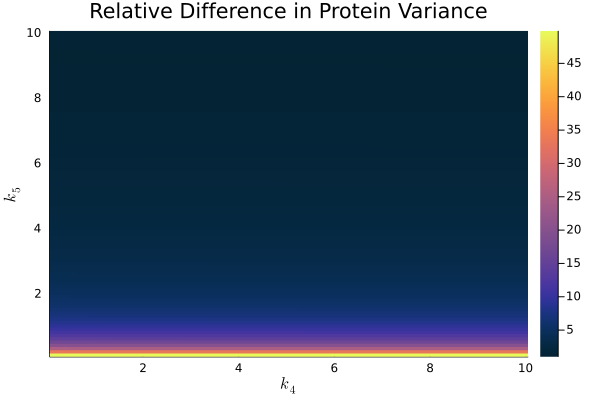

In [69]:
k4 = range(0.1, 10, length=100)
k5 = range(0.1, 10, length=100)


heatmap(k4, k5, var_diff, c = :thermal, title = "Relative Difference in Protein Variance")
xlabel!(L"k_4")
ylabel!(L"k_5")